# Introduction

This module is in charge of reading the POPS housekeeping file and converting it to a [TimeSeries instance](./timeseries.ipynb).

# Imports

In [1]:
from atmPy.aerosols.instruments.POPS import housekeeping
%matplotlib inline

# Reading a housekeeping file

In [4]:
filename = './data/POPS_housekeeping.csv'
hk = housekeeping.read_file(filename, version='sbRio')

In [5]:
hk.data.columns

Index(['Time_s', 'Status', 'Flow_Rate_ccps', 'Particle_rate_nops', '12V_Mon',
       'A1', 'A2', 'A3', 'Therm_1', 'Therm_2', 'TiltRef', 'POPS_Flow',
       'POPS_P', 'ULR_AZ_Home', 'ULR_PD_T', 'ULR_Incl_x', 'ULR_Incl_y',
       'ULR_Incl_T', 'POPS_LD_T', 'POPS_T_LED', 'POPS_LP_Set', 'MeanBL',
       'stdDevBL'],
      dtype='object')

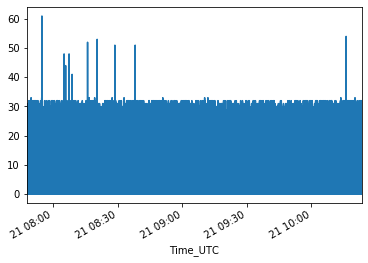

In [6]:
hk.data.stdDevBL.plot()

Done! hk is an instance of TimeSeries and you can do with it what ever the instance is capable of ([see here](./timeseries.ipynb)). E.g. plot stuff.

In [7]:
out = hk.plot_all()

AttributeError: 'POPSHouseKeeping' object has no attribute 'plot_all'

In [8]:
from atmPy.aerosols.instruments import POPS

In [9]:
reload(POPS)
reload(POPS.housekeeping)

NameError: name 'reload' is not defined

In [34]:
fname = '/Users/htelg/data/2017_ICARUS/POPS_SN14_ambient_more_raw/F20170523/HK_20170523x001.csv'
hk = POPS.read_housekeeping(fname)

In [36]:
for col in hk.data.columns:
    print(col)

Status
PartCt
PartCon
BL
BLTH
STD
P
TofP
POPS_Flow
PumpFB
LDTemp
LaserFB
LD_Mon
Temp
BatV
Laser_Current
Flow_Set
BL_Start
TH_Mult
nbins
logmin
logmax
Skip_Save
MinPeakPts
MaxPeakPts
RawPts
Barometric_pressure


In [39]:
sel = hk._del_all_columns_but(['Temp','TofP','LDTemp'])

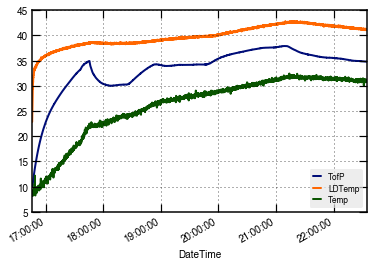

In [40]:
sel.data.plot()

In [41]:
hk.get_timespan()

(Timestamp('2017-05-23 16:45:59.288000'),
 Timestamp('2017-05-23 22:34:47.301000'))

In [12]:
col_names = pd.read_csv(fname, sep=',', nrows=1, header=None,
                         #             index_col=1,
                         #             usecols=np.arange()
                         ).values[0][:-1].astype(str)
col_names = np.char.strip(col_names)
col_names

array(['DateTime', 'Status', 'PartCt', 'PartCon', 'BL', 'BLTH', 'STD', 'P',
       'TofP', 'POPS_Flow', 'PumpFB', 'LDTemp', 'LaserFB', 'LD_Mon',
       'Temp', 'BatV', 'Laser_Current', 'Flow_Set', 'BL_Start', 'TH_Mult',
       'nbins', 'logmin', 'logmax', 'Skip_Save', 'MinPeakPts',
       'MaxPeakPts', 'RawPts'],
      dtype='<U14')

In [18]:
col_names = pd.read_csv(fname, sep=',', nrows=1, header=None,
                         #             index_col=1,
                         #             usecols=np.arange()
                         ).values[0][:-1].astype(str)
col_names = np.char.strip(col_names)

data = pd.read_csv(fname, sep=',', skiprows=1, header=None,
                    #             index_col=1,
                    #             usecols=np.arange()
                    )

data_hk = data.iloc[:, :27]
data_hk.columns = col_names
data_hk.index = pd.to_datetime(data_hk['DateTime'], unit='s')
data_hk.drop('DateTime', axis=1, inplace=True)
#     hk = atmPy.general.timeseries.TimeSeries(data_hk, sampling_period = 1)

hk = _housekeeping.POPSHouseKeeping(data_hk, sampling_period=1)
hk.data['Barometric_pressure'] = hk.data['P']

In [13]:
col_names = pd.read_csv(fname, sep=',', nrows=1, header=None).values[0][:-1].astype(str)
col_names = np.char.strip(col_names)
pd.read_csv(fname, usecols=range(5), skiprows=1, )

,1495557959.288,1,0,0.00,2261
0,1.495558e+09,1,3,6.02,2258
1,1.495558e+09,1,6,12.05,2258
2,1.495558e+09,1,4,8.03,2259
3,1.495558e+09,1,3,6.09,2260
4,1.495558e+09,1,4,7.94,2259
5,1.495558e+09,1,1,1.99,2260
6,1.495558e+09,1,1,1.99,2261
7,1.495558e+09,1,4,8.03,2260
8,1.495558e+09,1,3,5.96,2260
9,1.495558e+09,1,7,14.06,2260
